[1.299, 1.117, 1.031, 1.018, 0.961, 0.941, 0.93, 0.938, 0.901, 0.901, 0.886, 0.861, 0.855, 0.876, 0.854, 0.856, 0.831, 0.836, 0.83, 0.824, 0.809, 0.817, 0.783, 0.766, 0.786, 0.786, 0.747, 0.732, 0.723, 0.717, 0.719, 0.684, 0.69, 0.669, 0.664, 0.639, 0.627, 0.628, 0.639, 0.604, 0.617, 0.58, 0.579, 0.572, 0.59, 0.596, 0.575, 0.563, 0.577, 0.574]


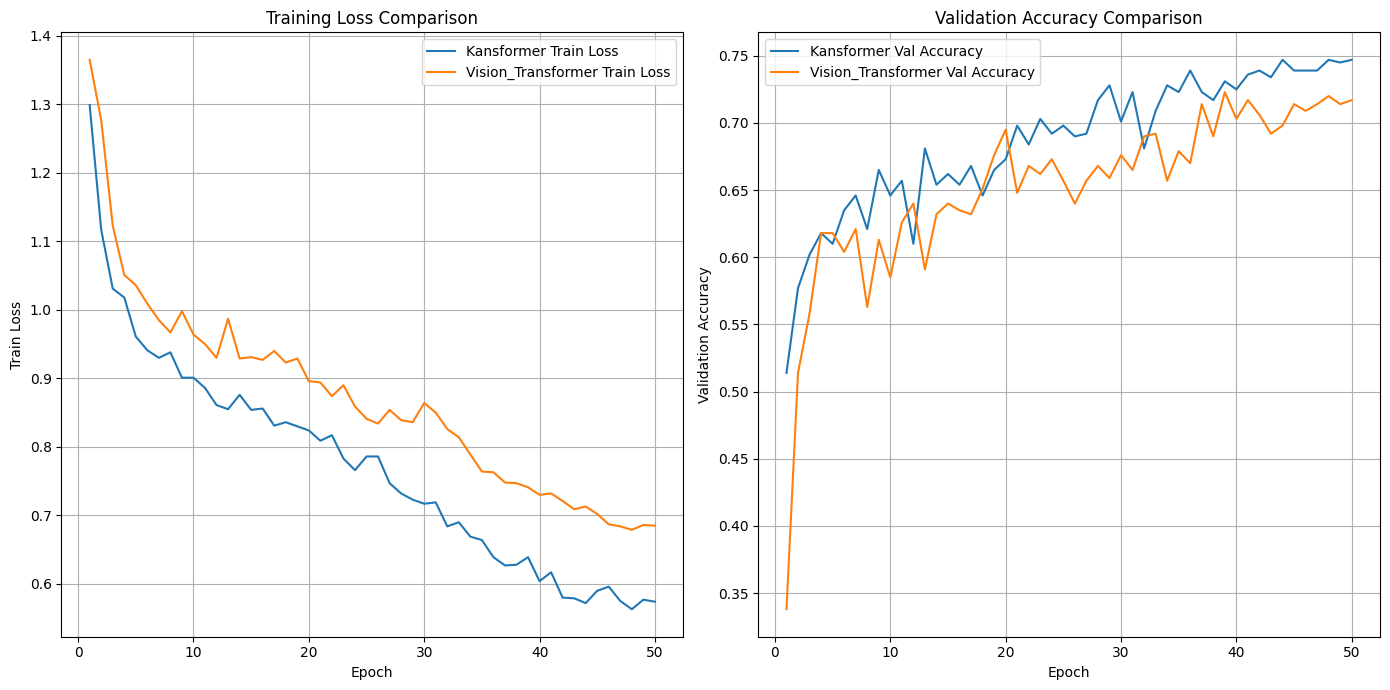

In [6]:
import re  # 导入正则表达式模块
import matplotlib.pyplot as plt  # 导入绘图模块

def extract_data(filename):
    """
    从文件中提取数据。
    
    参数:
    filename (str): 包含数据的文件名
    
    返回:
    tuple: 包含提取的数据的元组，分别是epochs, train_loss, val_accuracy
    """
    epochs = []  # 用于存储epoch的列表
    train_loss = []  # 用于存储训练损失的列表
    val_accuracy = []  # 用于存储验证准确率的列表

    with open(filename, 'r') as file:  # 打开文件
        lines = file.readlines()  # 读取文件的所有行
        for line in lines:  # 遍历每一行
            epoch_match = re.search(r'\[epoch (\d+)\]', line)  # 在当前行中查找epoch
            if epoch_match:  # 如果找到epoch
                epoch = int(epoch_match.group(1))  # 提取epoch值
                epochs.append(epoch)  # 将epoch添加到列表中
                
                train_loss_match = re.search(r'train_loss: ([\d\.]+)', line)  # 在当前行中查找训练损失
                if train_loss_match:  # 如果找到训练损失
                    train_loss.append(float(train_loss_match.group(1)))  # 提取并添加训练损失
                
                val_acc_match = re.search(r'val_accuracy: ([\d\.]+)', line)  # 在当前行中查找验证准确率
                if val_acc_match:  # 如果找到验证准确率
                    val_accuracy.append(float(val_acc_match.group(1)))  # 提取并添加验证准确率

    return epochs, train_loss, val_accuracy  # 返回提取的数据

# 提取KAN和ViT的数据
kan_epochs, kan_train_loss, kan_val_accuracy = extract_data('results/weights/kansformer1/kansformer_flower_log.txt')  # 提取Kansformer数据
vit_epochs, vit_train_loss, vit_val_accuracy = extract_data('results/weights/vision_transformer1/vision_transformer_flower_log.txt')  # 提取ViT数据
print(kan_train_loss)
# 绘制折线图
plt.figure(figsize=(14, 7))  # 创建一个14x7大小的图像

# 绘制训练损失折线图
plt.subplot(1, 2, 1)  # 将图像分割为1行2列，在第1个子图中绘制
plt.plot(kan_epochs, kan_train_loss, label='Kansformer Train Loss')  # 绘制Kansformer的训练损失曲线
plt.plot(vit_epochs, vit_train_loss, label='Vision_Transformer Train Loss')  # 绘制ViT的训练损失曲线
plt.xlabel('Epoch')  # 设置x轴标签
plt.ylabel('Train Loss')  # 设置y轴标签
plt.title('Training Loss Comparison')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

# 绘制验证准确率折线图
plt.subplot(1, 2, 2)  # 在第2个子图中绘制
plt.plot(kan_epochs, kan_val_accuracy, label='Kansformer Val Accuracy')  # 绘制Kansformer的验证准确率曲线
plt.plot(vit_epochs, vit_val_accuracy, label='Vision_Transformer Val Accuracy')  # 绘制ViT的验证准确率曲线
plt.xlabel('Epoch')  # 设置x轴标签
plt.ylabel('Validation Accuracy')  # 设置y轴标签
plt.title('Validation Accuracy Comparison')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.tight_layout()  # 调整子图布局，使其更美观
plt.savefig('kansformer_vit_plot.png')  # 保存图像为PNG格式文件
plt.show()  # 显示图像
